# **Question 1** #

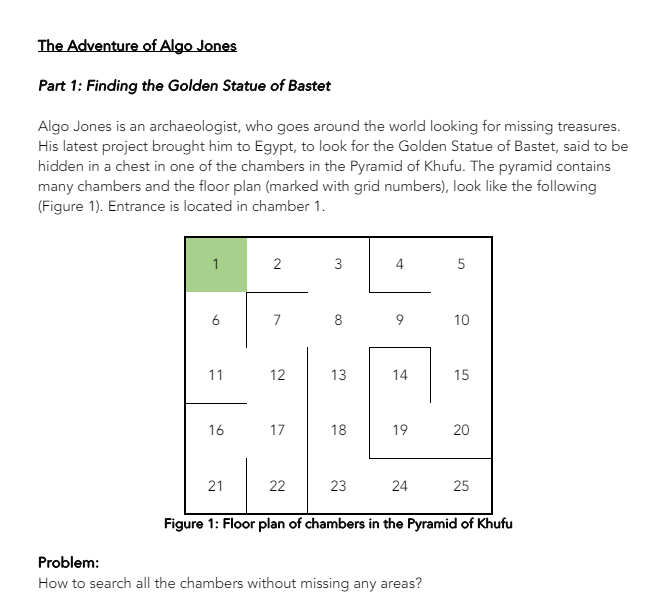

## **Algorithms that Can Be Used** ##

### **Breadth-First Search** ##
- Breadth First Search (BFS) is a graph traversal algorithm that explores all the vertices in a graph at the current depth before moving on to the vertices at the next depth level. It starts at a vertex and visits all its neighbours before moving on to the next level of neghbours. This algorithm is commonly used for pathfinding. In the context of the map, the algorithm visits the initial chamber, 1, and its first-level neighbouring chambers. This process is recursively executed to keep on visiting the first-level neighbours until all the chambers are visited. The process will eventually end until it visits the deepest level of neighbouring chambers breadth-wise.

### **Depth-First Search** ##
- Depth First Search (DFS) is an algorithm that explores as far as possible along each branch before backtracking. With the map given as context, the algorithm visits the initial chamber, 1, then explores all its neighbours depth-wise. This process will continue until all the chambers of the initial chamber is visitied depth-wise, then it goes on to the next first-level neighbouring chamber of 1. The process will eventually end until it visits all the first-level neighbouring chambers of chamber 1 depth-wise first.

### **Hamiltonian Path Algorithm** ###
- This algorithm is designed to find a Hamiltonian path, which is a path that visits each
vertex (room) exactly once. In the context of room searching, the algorithm would aim
to find a Hamiltonian path that covers all the rooms in the building. This algorithm
ensures that no room is missed during the search process.


## **Things to Understand before Algorithm** ##

Because the starting point of the chamber is 1, and Python is 0 - indexed, I transposed each point in the adjacency list to be one subtracted from its original value, thus a value of [0,24] is observed. However, this does not affect the accuracy of the algorithm. In the end, as we observe the shortest path explored, it is restored back to the original chambers set [1,25], but this is hard-coded as each chamber explored is added by one again before it is being printed out. Therefore, when reading the code, the discrepancy of subtracting one from the chamber needs to be taken into account

## **Detailed Breakdown of the Algorithm** ##

### **Initialize Variables** ###

#### **Number of Chambers (n):** ####

The variable n stores the total number of chambers in the graph. It helps us create initial states and determine when all chambers have been visited.

#### **Queue (queue):** ####

We initialize a queue to store the states we need to explore. A deque is used for its efficient O(1) append and pop operations.

#### **Visited Set (visited):** ####

A set is used to keep track of states that have already been visited. This avoids redundant work and cycles.

#### **Path (pathMap)** ####

A dictionary is used to store the shortest path to explore all the chambers. 

### **Initialization Step** ###

#### **Initial States:** ####

Chamber 1 is used as the starting point, and for each starting node i, an initial state is enqueued. The state is represented as a tuple (mask, chamber, dist, [path] that is a list to store the chambers along the shortest path).
mask = 1 << i: Only the i-th bit is set, indicating that only node i is visited.
chamber = i: The current chamber is i.
dist = 0: The distance traveled so far is zero.
path = [1] : The current chamber explored in the shortest path is 1, given the fact that 1 is the entrance chamber, thus the shortest path has to start from 1

**Main BFS Loop**

**Dequeue State:**

A state is dequeued from the front of the queue. This state contains:
**mask**: Bitmask representing the visited nodes.
**chamber**: The current chamber.
**dist**: The distance traveled to reach this state.
**path** : The chambers travelled along the shortest path

**Check for Goal State:**

If the bitmask equals (1 << n) - 1, it means all chambers have been visited. In that case, the algorithm returns the distance for that state, effectively solving the problem.

**Explore Neighbors:**

For the current chamber, all its neighbors in the graph are explored. For each neighbor, a new state is generated.
**new_mask** = mask | (1 << neighbor): The new mask includes the neighbor as visited.
**new_node** = neighbor: The new current node is the neighbor.
**new_dist** = dist + 1: The distance is incremented by 1.


**Check and Enqueue New States:**

Before enqueuing the new state, we check whether it has already been visited. If not, it's added to the visited set and enqueued for future exploration. The new chamber explored along the current shortest path is concatenated into the initial array, which is then appended into the queue as well to store the information.

**Termination and Result :**

The BFS loop continues until the queue is empty or the goal state is reached. The shortest distance required to visit all chambers is then returned. The chambers explored along the shortest path is also printed.

**Time and Space Complexity**

Time Complexity: O(2^n × n), where n is the number of chambers. This is because there are 2^n possible subsets of chambers and n chambers to consider for each subset.
  


In [13]:
from typing import List, Tuple
from collections import deque

def shortestPathLength(graph: List[List[int]]) -> Tuple[int, List[int]]:
    n = len(graph)
    queue = deque([(1 << 0, 0, 0, [1])])  # Start from node 0
    visited = set((1 << 0, 0))
        
    while queue:
        mask, chamber, dist, path = queue.popleft()
        if mask == (1 << n) - 1:
            return dist, path
        for neighbor in graph[chamber]:
            new_mask = mask | (1 << neighbor)
            if (new_mask, neighbor) not in visited:
                visited.add((new_mask, neighbor))
                new_path = path + [neighbor + 1]
                queue.append((new_mask, neighbor, dist + 1, new_path))

adjList = [
    [1,5],
    [0,2],
    [1,7],
    [4],
    [3,9],
    [0,10],
    [7,11],
    [2,6,8,12],
    [7,9],
    [4,8,14],
    [5,11],
    [6,10,16],
    [7,17],
    [18],
    [9,19],
    [16,20],
    [11,15,21],
    [12,22],
    [13,19],
    [14,18],
    [15],
    [16],
    [17,23],
    [22,24],
    [23]
]

shortest_path_length, shortest_path = shortestPathLength(adjList)
print("Shortest path length:", shortest_path_length)
print("Chambers visited for shortest path:", shortest_path)


Shortest path length: 37
Chambers visited for shortest path: [1, 2, 1, 6, 11, 12, 17, 16, 21, 16, 17, 22, 17, 12, 7, 8, 3, 8, 13, 18, 23, 24, 25, 24, 23, 18, 13, 8, 9, 10, 5, 4, 5, 10, 15, 20, 19, 14]
